In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from func import neuron_layer,neuron_layers

In [2]:
my_layers = neuron_layers([1,2,3,2],0.005)

The Mosttt  3


In [3]:
np.shape(my_layers.layers[-1].x)

(3, 1)

In [4]:
data = np.reshape(np.array([2]) , (1,1))
expected = np.reshape(np.array([2]), (1,1))

err , exp , desired = my_layers.calc_output(data,expected)


 
 |||| In neuron 0
Forward Calculations || W.x + b || == a 

W -> 
 [[0.28480589]
 [0.99334703]], x -> 
 [[2]], b -> 
 [[0.44943824]
 [0.60922752]]
----
a -> [[1.01905002]
 [2.59592158]]
Nonlinear ||σ(a) = y|| == a 

a -> [[1.01905002]
 [2.59592158]] 
σ(a) -> [[0.73478751]
 [0.93059864]]

 
 |||| In neuron 1
Forward Calculations || W.x + b || == a 

W -> 
 [[0.00230327 0.70179544]
 [0.49628564 0.76227863]
 [0.77664389 0.24045382]], x -> 
 [[0.73478751]
 [0.93059864]], b -> 
 [[0.48913244]
 [0.01424378]
 [0.57767642]]
----
a -> [[1.14391474]
 [1.08828373]
 [1.37211065]]
Nonlinear ||σ(a) = y|| == a 

a -> [[1.14391474]
 [1.08828373]
 [1.37211065]] 
σ(a) -> [[0.75839767]
 [0.7480584 ]
 [0.79772095]]

 
 |||| In neuron 2
Forward Calculations || W.x + b || == a 

W -> 
 [[0.92111042 0.59584238 0.71036377]
 [0.25649824 0.14184774 0.7098933 ]], x -> 
 [[0.75839767]
 [0.7480584 ]
 [0.79772095]], b -> 
 [[0.68831168]
 [0.57671743]]
----
a -> [[2.39927663]
 [1.44365225]]


In [5]:
for i in my_layers.layers:
    print("X values \n{}, W values \n{}, Sig values\n{}".format(i.x,i.w,i.sig))

#print("\n\n",(out-expected)**2)
#print(err) ## Mean squarer error

print("\n Error\n {}".format(my_layers.layers[-1].j))

X values 
[[2]], W values 
[[0.28480589]
 [0.99334703]], Sig values
[[0.73478751]
 [0.93059864]]
X values 
[[0.73478751]
 [0.93059864]], W values 
[[0.00230327 0.70179544]
 [0.49628564 0.76227863]
 [0.77664389 0.24045382]], Sig values
[[0.75839767]
 [0.7480584 ]
 [0.79772095]]
X values 
[[0.75839767]
 [0.7480584 ]
 [0.79772095]], W values 
[[0.92111042 0.59584238 0.71036377]
 [0.25649824 0.14184774 0.7098933 ]], Sig values
[[0.]
 [0.]]

 Error
 [[0.15942183]
 [0.30952282]]


In [6]:
my_layers.layers[1].x

array([[0.73478751],
       [0.93059864]])

In [7]:
da_dw = -2*err

##### 1- w_1*x  + b_1 = a_0      || Layer 1
##### 2- c_0 = σ(a_0)
##### 3- w_2*c_0 + b_2 = a_1     || Layer 2
##### 4- c_1 = σ(a_1) 
##### 5- w_3*c_1 + b_3 = a_2     || Layer 3 (Output Layer)

##### First weigtth derivatives
#####
##### dJ/dw_2 = [ (dJ/dy)*(dy/da) ] * d_c1
##### --> Send for other derivatives dJ/dc = [ (dJ/dy)*(dy/da) ]*w

######## dC/dw_2 = (dC/dy)*(dy/da_2)*(da_2/d_c1)*(dc_1/d_a1)*(da_1/dw_2)
##### (dJ/dy)   = -2J
##### (dy/da_2) = 1
##### (da_2/d_c1) = w_3
##### (dc_1/d_a1) = -c_1(1-c_1)
##### (da_1/dw_2) = c_0

##### dw_2 @ layer[1]

dJ_da = -2*my_layers.layers[-1].j 
a = (len(my_layers.layers) - 1 )

for i in range(0,3):

    print("!!! Neuron ",a)
    print(np.shape(dJ_da),np.shape(my_layers.layers[a].x),type(my_layers.layers[a].x))

    if a == (len(my_layers.layers) - 1 ):
        dJ_da = dJ_da.T
        # No activation layer
    else:
        dJ_da = dJ_da * my_layers.layers[a].sig.T
        
    print(type(my_layers.layers[a].x),np.shape(my_layers.layers[a].x))

    dJ_dw = dJ_da.T @  my_layers.layers[a].x.T
    
    da_dc = my_layers.layers[a].w
    
    dJ_dc = dJ_da @ da_dc

    dJ_da = dJ_dc ## Pass down


    print("Derivatives of the weigth factos \n {} \n".format(dJ_dw))
    print(np.shape(dJ_dw))

    a = a-1


!!! Neuron  2
(2, 1) (3, 1) <class 'numpy.ndarray'>
<class 'numpy.ndarray'> (3, 1)
Derivatives of the weigth factos 
 [[-0.24181029 -0.23851368 -0.25434826]
 [-0.46948277 -0.4630823  -0.49382568]] 

(2, 3)
!!! Neuron  1
(1, 3) (2, 1) <class 'numpy.ndarray'>
<class 'numpy.ndarray'> (2, 1)
Derivatives of the weigth factos 
 [[-0.25214636 -0.31934002]
 [-0.15269159 -0.19338187]
 [-0.39035097 -0.49437432]] 

(3, 2)
!!! Neuron  0
(1, 2) (1, 1) <class 'numpy.ndarray'>
<class 'numpy.ndarray'> (1, 1)
Derivatives of the weigth factos 
 [[-0.75904619]
 [-0.98079287]] 

(2, 1)


In [8]:
my_layers.back_prop()

 Backproped @ Neuron: 2 
Ohhhh my godd !! [[-0.25214636 -0.31934002]
 [-0.15269159 -0.19338187]
 [-0.39035097 -0.49437432]]
 Backproped @ Neuron: 1 
Ohhhh my godd !! [[-0.75904619]
 [-0.98079287]]
 Backproped @ Neuron: 0 


In [9]:
### Neuraon Network Parameters
hidden_layers=[1,2,3,2]
learning_rate = 5*10**-5
my_layers = neuron_layers(hidden_layers,learning_rate)

for i in range (0,len(my_layers.layers)):
    print("Neuron num | {} | \t Input Size | {} | \t Output Size  | {} | \t ".format(i, np.shape(my_layers.layers[i].w)[1], np.shape(my_layers.layers[i].w)[0]) )

### Simulations parameters
#### TIME
# Sample time
st = 1
# Start- End time 
strt_time = 0
endtime = 100
# Time array 
time_array = np.arange(strt_time, endtime+st, st)

### Data
x_series   = [] ## Input
smpl_cnt   =  int( ( strt_time - endtime ) / st ) 
exp_series = [] ## Expected

### Store the output
output = []
error  = []

my_data_set_1 = []
my_expected_val_1 = []


def _fnc(x,num):
    if num == 1:
        if i %5 :
            a= 10*np.sin(i)
        elif i %3:
            a= -2*i + 10
        else:
            a = 10*i**0.5
        return a
    elif num == 2:
        if i %6 :
            a= np.sin(i) + i**0.1
        elif i %3:
            a= np.cos(i)*10
        else:
            a = i
        return a
    else:
        return np.exp(np.sin(i)*0.5)

for i in range (strt_time,endtime+1):
    val_1 = (_fnc(i,4))
    val_2 = (_fnc(i,2))
    val_3 = (_fnc(i,3))

    arr = np.array([val_1,val_2]).T
    arr = np.reshape(arr,(np.shape(arr)[0],1))

    arr_2 = np.array([i])
    arr_2 = np.reshape(arr_2,(np.shape(arr_2)[0],1))

    my_expected_val_1.append(arr)
    my_data_set_1.append(arr_2)

for i in range (strt_time,endtime+1):
    ## Shape x_series -> (hidden_layers[0],1)
    ## EXP x_series ->   (hidden_layers[-1],1)
    x_series.append(np.random.randn(hidden_layers[0],1))
    exp_series.append(np.random.randn(hidden_layers[1],1))


The Mosttt  3
Neuron num | 0 | 	 Input Size | 1 | 	 Output Size  | 2 | 	 
Neuron num | 1 | 	 Input Size | 2 | 	 Output Size  | 3 | 	 
Neuron num | 2 | 	 Input Size | 3 | 	 Output Size  | 2 | 	 


In [10]:
np.shape(my_expected_val_1)

(101, 2, 1)

In [11]:
output = np.zeros((np.shape(time_array)[0],2,1))
error = np.zeros((np.shape(time_array)[0],2,1))

epoc = 5
for j in range (0,epoc):
    for i in range (strt_time,endtime+1):
        ## Feed forward
        err,exp,desired = my_layers.calc_output(my_data_set_1[i],my_expected_val_1[i])
        my_layers.back_prop()
        
        if (j == epoc-1):
        ## Backprop
            ## Save the results
            output[i,:,:]= exp
            error [i,:,:]= err



 
 |||| In neuron 0
Forward Calculations || W.x + b || == a 

W -> 
 [[0.12430275]
 [0.03086935]], x -> 
 [[0]], b -> 
 [[0.89208531]
 [0.70528113]]
----
a -> [[0.89208531]
 [0.70528113]]
Nonlinear ||σ(a) = y|| == a 

a -> [[0.89208531]
 [0.70528113]] 
σ(a) -> [[0.70932032]
 [0.66935763]]

 
 |||| In neuron 1
Forward Calculations || W.x + b || == a 

W -> 
 [[0.02019632 0.21864408]
 [0.90396004 0.65747628]
 [0.44994698 0.55341578]], x -> 
 [[0.70932032]
 [0.66935763]], b -> 
 [[0.55489124]
 [0.54467488]
 [0.61819273]]
----
a -> [[0.71556799]
 [1.62595886]
 [1.30778234]]
Nonlinear ||σ(a) = y|| == a 

a -> [[0.71556799]
 [1.62595886]
 [1.30778234]] 
σ(a) -> [[0.67163031]
 [0.83561529]
 [0.78714183]]

 
 |||| In neuron 2
Forward Calculations || W.x + b || == a 

W -> 
 [[0.8021347  0.72364148 0.37902941]
 [0.79178986 0.94562043 0.57415374]], x -> 
 [[0.67163031]
 [0.83561529]
 [0.78714183]], b -> 
 [[0.11272544]
 [0.93714561]]
----
a -> [[1.55449921]
 [2.71105099]]
 Backproped @ Neuron: 

In [12]:
np.shape(np.array(my_expected_val_1)[:,0,0])

(101,)

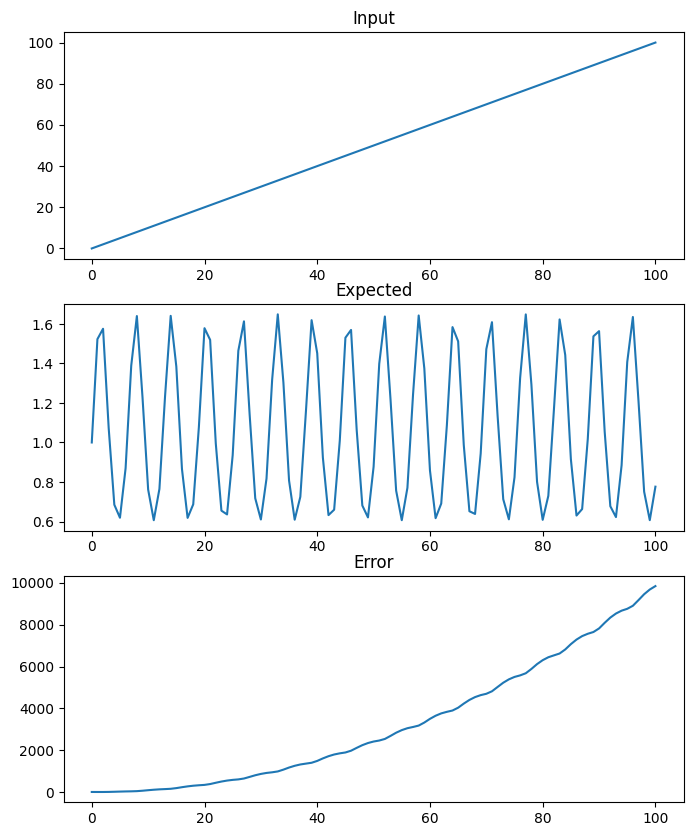

In [13]:
fig_2, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot data on each subplot
axs[0].plot(time_array, np.array(my_data_set_1)[:,:,0])
axs[0].set_title('Input')

axs[1].plot(time_array, np.array(my_expected_val_1)[:,0,0])
axs[1].set_title('Expected')


axs[2].plot(time_array, (np.array(my_data_set_1)[:,0,0] - np.array(my_expected_val_1)[:,0,0])**2)
axs[2].set_title('Error')


plt.show()

In [14]:


output = np.array(output)
error = np.array(error)
x_series = np.array(my_data_set_1)
exp_series =np.array(my_expected_val_1)

In [15]:
np.shape(x_series[:,0,:])

(101, 1)

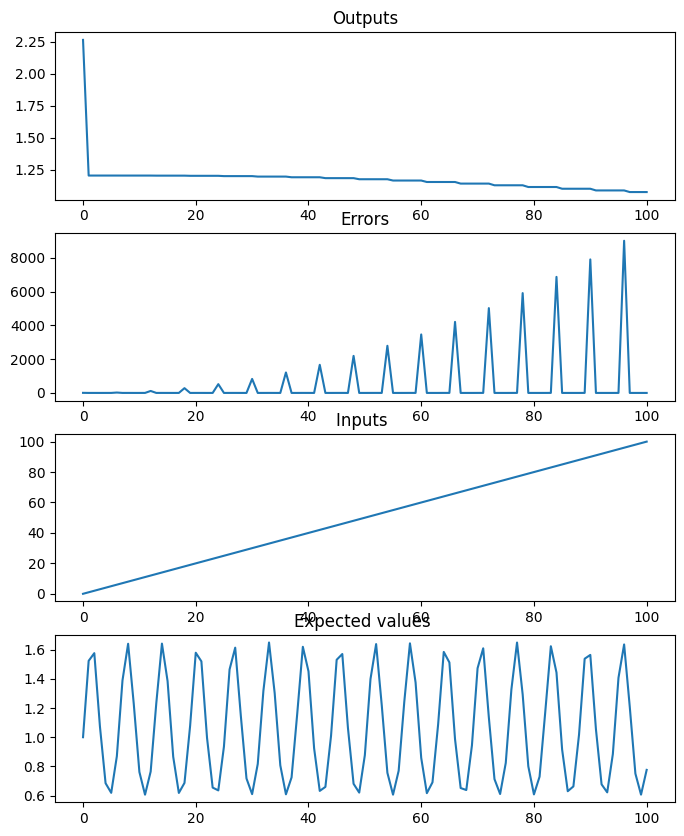

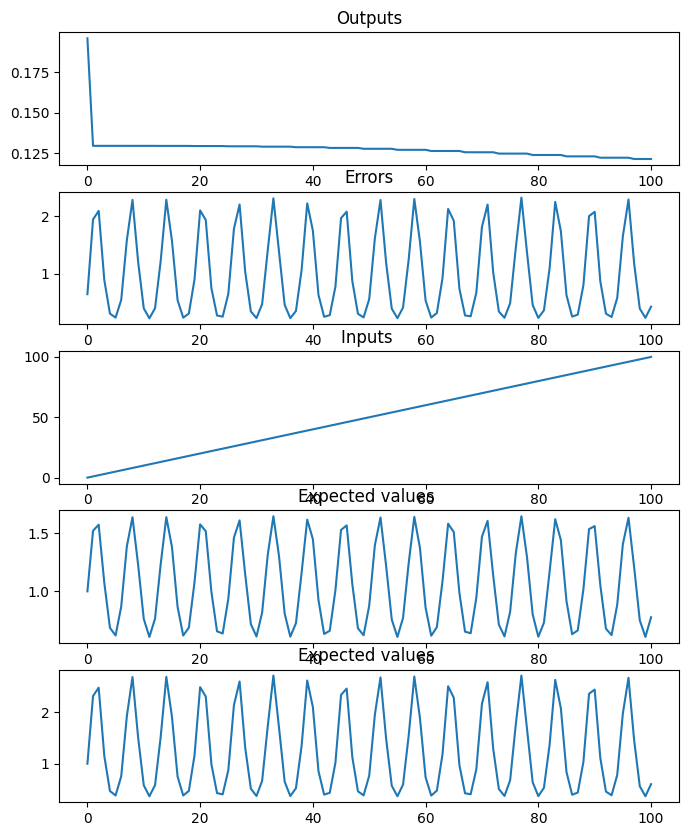

In [28]:
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 10))

# Plot data on each subplot
axs[0].plot(time_array, output[:,1,:])
axs[0].set_title('Outputs')

axs[1].plot(time_array, error[:,1,:])
axs[1].set_title('Errors')

axs[2].plot(time_array,x_series[:,0,:])
axs[2].set_title('Inputs ')

axs[3].plot(time_array, exp_series[:,0,:])
axs[3].set_title('Expected values ')


axs[4].plot(time_array, exp_series[:,0,:]**2)
axs[4].set_title('Expected values ')

plt.show()

fig_2, axs = plt.subplots(5, 1, figsize=(8, 10))

# Plot data on each subplot
axs[0].plot(time_array, output[:,0,:])
axs[0].set_title('Outputs')

axs[1].plot(time_array, error[:,0,:])
axs[1].set_title('Errors')

axs[2].plot(time_array,x_series[:,0,:])
axs[2].set_title('Inputs ')

axs[3].plot(time_array, exp_series[:,0,:])
axs[3].set_title('Expected values ')

axs[4].plot(time_array, exp_series[:,0,:]**2)
axs[4].set_title('Expected values ')
plt.show()

In [17]:
my_layers.layers[0].x

array([[100]])

In [26]:
np.shape(data)

(101, 1)


 
 |||| In neuron 0
Forward Calculations || W.x + b || == a 

W -> 
 [[844.24327864]
 [750.27681371]], x -> 
 [[0]], b -> 
 [[0.89208531]
 [0.70528113]]
----
a -> [[0.89208531]
 [0.70528113]]
Nonlinear ||σ(a) = y|| == a 

a -> [[0.89208531]
 [0.70528113]] 
σ(a) -> [[0.70932032]
 [0.66935763]]

 
 |||| In neuron 1
Forward Calculations || W.x + b || == a 

W -> 
 [[-3.17015197 -2.78553543]
 [-2.98123596 -2.97917585]
 [-3.17221572 -2.84714703]], x -> 
 [[0.70932032]
 [0.66935763]], b -> 
 [[0.55489124]
 [0.54467488]
 [0.61819273]]
----
a -> [[-3.55828135]
 [-3.56411044]
 [-3.53768391]]
Nonlinear ||σ(a) = y|| == a 

a -> [[-3.55828135]
 [-3.56411044]
 [-3.53768391]] 
σ(a) -> [[0.02769867]
 [0.02754212]
 [0.02825882]]

 
 |||| In neuron 2
Forward Calculations || W.x + b || == a 

W -> 
 [[ 0.80695913  0.7287392   0.38413569]
 [10.11358041 10.325576   10.16308226]], x -> 
 [[0.02769867]
 [0.02754212]
 [0.02825882]], b -> 
 [[0.11272544]
 [0.93714561]]
----
a -> [[0.16600338]
 [1.78886326]]


Text(0.5, 1.0, 'Data')

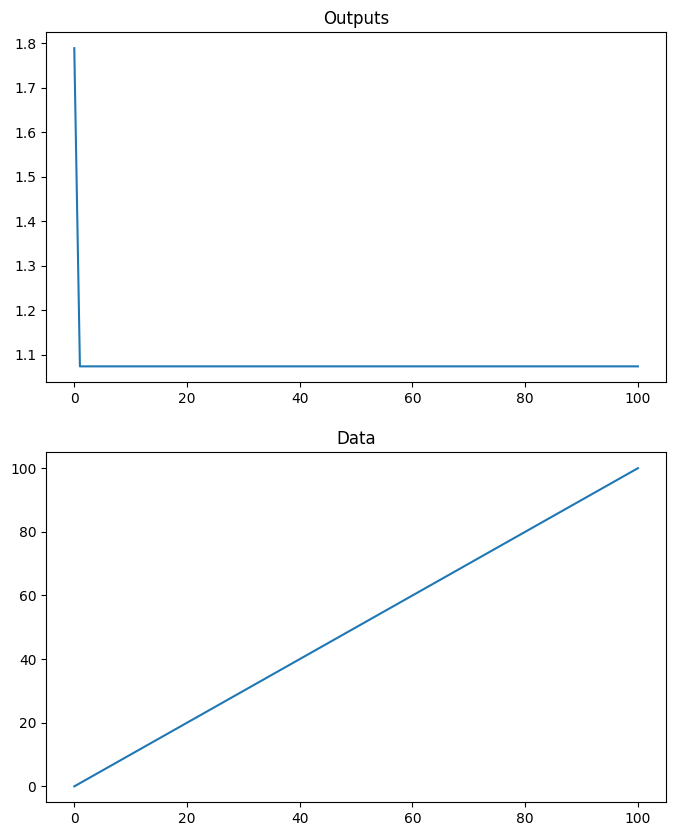

In [27]:
results = np.zeros((np.shape(time_array)[0],2))
data = np.zeros((np.shape(time_array)[0],1))

for i in range (0,np.shape(time_array)[0]):
   a =  my_layers.forward(np.reshape(np.array([i]),(1,1)))
   results[i,:] = np.reshape(a,(2,1)).T
   data[i,:] = np.reshape(np.array([i]),(1,1))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot data on each subplot
axs[0].plot(time_array, results[:,1])
axs[0].set_title('Outputs')

axs[1].plot(time_array, data)
axs[1].set_title('Data')